# Figure 12.
| Author  | Stanley A. Baronett  |
|---------|----------------------|
| Created |  08/23/2025          |
| Updated |  08/23/2025          |

Similar to Figure 11 except for different scattering modes only in RADMC-3D.
Colors show models with only absorption opacities $\kappa^\mathrm{abs}$, with
both absorption and isotropic scattering opacities $\kappa^\mathrm{abs+sca}$,
and with both absorption and anisotropic scattering opacities $\kappa^{\mathrm{abs+sca}+g}$ (Section 4.3.2).
As the domains in effective depth to peak stellar irradiation $\tau_*$ between models with and without scattering differ by an order of magnitude (upper-right panel), the lower-right panel shows the relative difference only between models with scattering.

Opacity		Section	Latitude	Optical Depths		Rel. Diff. in \Teq(θ)
								Avg.	Max.
(cm^2\gm^{-1})		(deg)					(%)	(%)
(1)		(2)	(4)		(5)			(10)	(11)
\knuabsscag	4.3.2						RADMC-3D
			30		3e-09 < τ < 2e-06	1%	1%
			10		3e-05 < τ < 2e+02	1%	6%
			0		5e-01 < τ < 2e+04	3%	9%


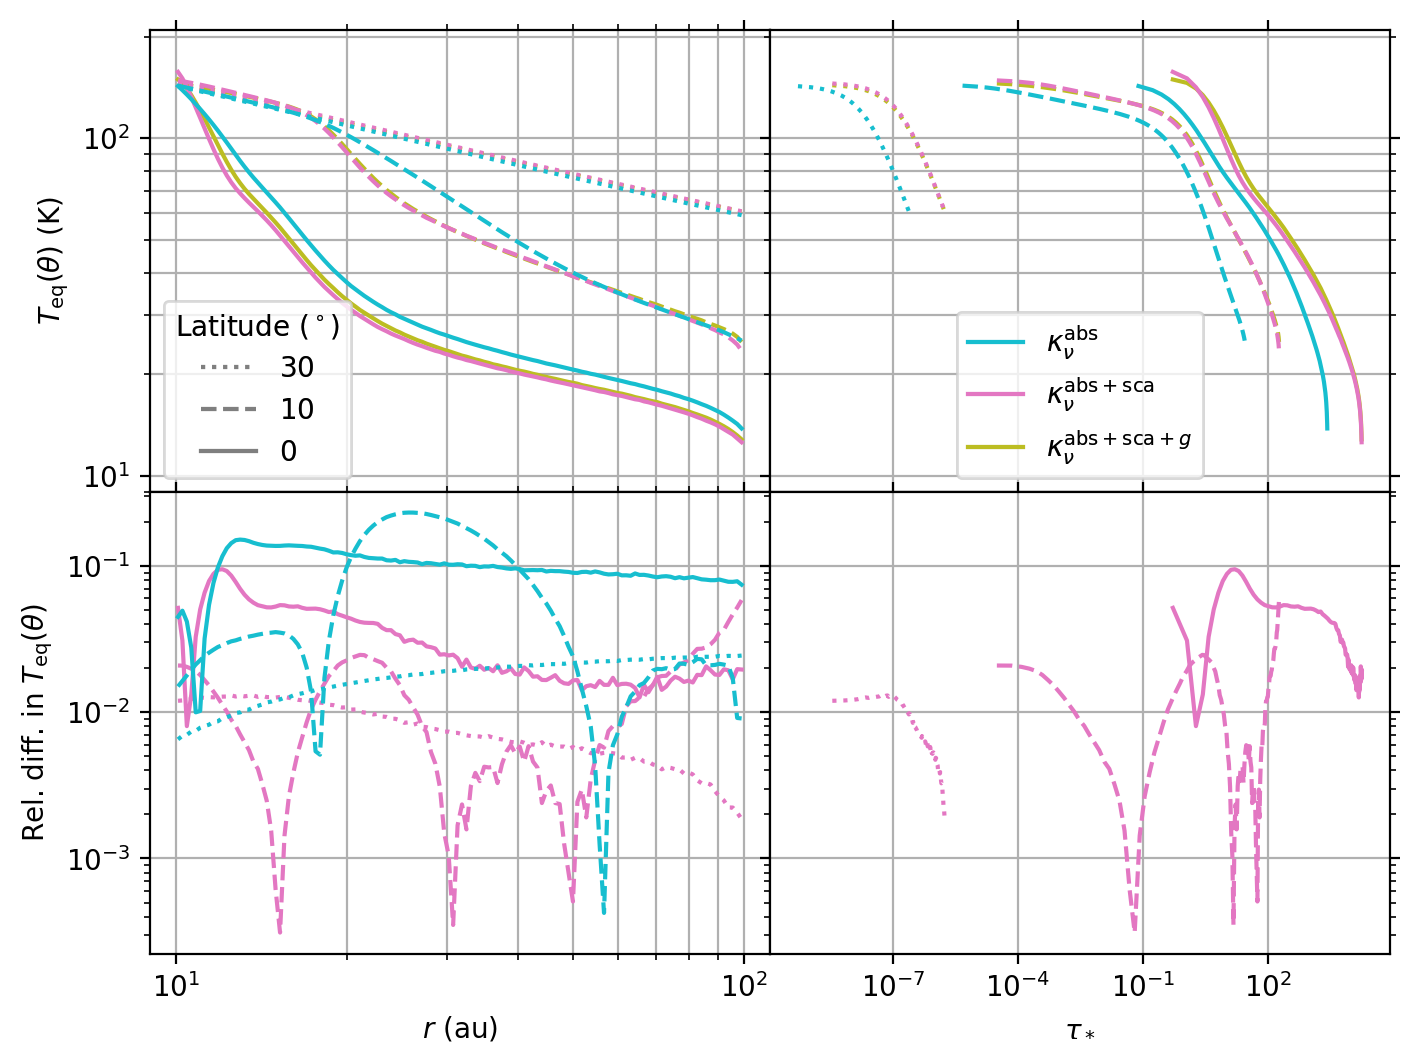

In [2]:
#===============================================================================
import athena_read
import matplotlib.pyplot as plt
import numpy as np

# Constants
au = 1.495978707e13           # astronomical unit [cm]
rad2deg = 180/np.pi

# Prepare plots
fig, axs = plt.subplots(nrows=2, ncols=2, sharex='col', sharey='row',
                        figsize=(8, 6), dpi=200)
lss = ['dotted', 'dashed', 'solid']
theta_degs = [60, 80, 90]
c_solns, ls_thetas = [], []

# RADMC-3D
root = '../radmc3d'
runs = [['dsharp_abs-sca-g', 'tab:olive'],
        ['dsharp_abs-sca', 'tab:pink'],
        ['dsharp_abs', 'tab:cyan']]
print('Opacity\t\tSection\tLatitude\tOptical Depths\t\tRel. Diff. in \Teq(θ)')
print(f'\t\t\t\t\t\t\t\tAvg.\tMax.')
print('(cm^2\gm^{-1})\t\t(deg)\t\t\t\t\t(%)\t(%)')
print('(1)\t\t(2)\t(4)\t\t(5)\t\t\t(10)\t(11)')
print(f'\knuabsscag\t4.3.2\t\t\t\t\t\tRADMC-3D')
for i, run in enumerate(runs):
  path = f'{root}/{run[0]}'
  grid = np.load(f'{path}/amr_grid.npz', allow_pickle=True)['grid'][()]
  taux = np.load(f'{path}/taux.npz')['taux']
  dusttemp = np.load(f'{path}/dust_temperature.npz')['dusttemp']
  dtheta = (grid.y[-1] - grid.y[0])/len(grid.y)
  for th, theta_deg in enumerate(theta_degs):
    j = int(theta_deg/rad2deg/dtheta)
    axs[0][0].plot(grid.x/au, dusttemp[:,j,0,0], color=run[1],
                   ls=lss[th])
    axs[0][1].plot(taux[:,j,0], dusttemp[:,j,0,0], color=run[1],
                   ls=lss[th])
    if i == 0:
      ref_temp = dusttemp
      ls_thetas.append(axs[1][1].plot([], [], color='tab:gray', ls=lss[th],
                       label=rf'${90-theta_deg}$')[0])
    else:
      rel_diff_temp = 2*np.abs(ref_temp[:,j,0,0] - dusttemp[:,j,0,0])\
                   /(ref_temp[:,j,0,0] + dusttemp[:,j,0,0])
      axs[1][0].plot(grid.x/au, rel_diff_temp, color=run[1], ls=lss[th])
      if i == 1:
        axs[1][1].plot(taux[:,j,0], rel_diff_temp, color=run[1], ls=lss[th])
        print(f'\t\t\t{90-theta_deg}\t\t{np.min(taux[:,j,0]):.0e} < τ < '\
              +f'{np.max(taux[:,j,0]):.0e}\t{np.mean(rel_diff_temp):.0%}\t'
              +f'{np.max(rel_diff_temp):.0%}')

# Multiple legends
c_solns.append(axs[0][1].plot([], [], color='tab:cyan',
               label=r'$\kappa_\nu^\mathrm{abs}$')[0])
c_solns.append(axs[0][1].plot([], [], color='tab:pink',
               label=r'$\kappa_\nu^\mathrm{abs+sca}$')[0])
c_solns.append(axs[0][1].plot([], [], color='tab:olive',
               label=r'$\kappa_\nu^{\mathrm{abs+sca}+g}$')[0])
axs[0][0].add_artist(axs[0][0].legend(framealpha=0.56, handles=ls_thetas,
                                      loc='lower left',
                                      title=r'Latitude ($^\circ)$'))
axs[0][1].add_artist(axs[0][1].legend(framealpha=0.56, handles=c_solns,
                                      loc='lower center'))

# Format plots
for ax in axs.flat:
    ax.grid()
    ax.minorticks_on()
    ax.set(xscale='log', yscale='log')
    ax.tick_params(axis='both', which='both', top=True, right=True)
axs[0][0].grid(axis='both', which='minor')
axs[0][1].grid(axis='y', which='minor')
axs[1][0].grid(axis='x', which='minor')
axs[0][0].set(ylabel=r'$T_\mathrm{eq}(\theta)$ (K)', ylim=(9, 2.1e2))
axs[1][0].set(xlabel=r'$r$ (au)', ylabel=r'Rel. diff. in $T_\mathrm{eq}(\theta)$')
axs[1][1].set(xlabel=r'$\tau_*$')
plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('figs/scattering_modes.pdf', bbox_inches='tight', pad_inches=0.01)
#===============================================================================